About the dataset

The goal is to predict climate model simulation outcomes (column 21, fail or succeed) given scaled values of
climate model input parameters (columns 3-20).


This dataset has 522 number of instances.
Column 1: Latin hypercube study ID (study 1 to study 3)
Column 2: simulation ID (run 1 to run 180)
Columns 3-20: values of 18 climate model parameters scaled in the interval [0, 1]
Column 21: simulation outcome (0 = failure, 1 = success)

DEPENDICIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import model_selection



Loading the csv file and analysing different features

In [2]:
crashes_data = pd.read_csv('crashesdata.csv')
crashes_data.head()


,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_6,vconst_7,ah_corr,...,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [3]:
crashes_data.shape

(540, 21)

In [4]:
crashes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study                 540 non-null    int64  
 1   Run                   540 non-null    int64  
 2   vconst_corr           540 non-null    float64
 3   vconst_2              540 non-null    float64
 4   vconst_3              540 non-null    float64
 5   vconst_4              540 non-null    float64
 6   vconst_5              540 non-null    float64
 7   vconst_6              540 non-null    float64
 8   vconst_7              540 non-null    float64
 9   ah_corr               540 non-null    float64
 10  ah_bolus              540 non-null    float64
 11  slm_corr              540 non-null    float64
 12  efficiency_factor     540 non-null    float64
 13  tidal_mix_max         540 non-null    float64
 14  vertical_decay_scale  540 non-null    float64
 15  convect_corr          5

We can see all values are numnerical , no categorial values
Lets check for missing values

In [5]:
crashes_data.isnull().sum()

Study                   0
Run                     0
vconst_corr             0
vconst_2                0
vconst_3                0
vconst_4                0
vconst_5                0
vconst_6                0
vconst_7                0
ah_corr                 0
ah_bolus                0
slm_corr                0
efficiency_factor       0
tidal_mix_max           0
vertical_decay_scale    0
convect_corr            0
bckgrnd_vdc1            0
bckgrnd_vdc_ban         0
bckgrnd_vdc_eq          0
bckgrnd_vdc_psim        0
outcome                 0
dtype: int64

In [6]:
crashes_data.describe()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_6,vconst_7,ah_corr,...,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,outcome
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,2.000000,90.500000,0.500026,0.500097,0.500027,0.500119,0.500001,0.499913,0.500059,0.500076,...,0.500111,0.499984,0.500032,0.499933,0.499944,0.499946,0.500044,0.500020,0.500021,0.914815
std,0.817254,52.008901,0.288939,0.288922,0.289067,0.288993,0.288827,0.288852,0.289010,0.288909,...,0.288966,0.289127,0.289014,0.288822,0.288949,0.288923,0.288813,0.288936,0.289013,0.279416
min,1.000000,1.000000,0.000414,0.001922,0.001181,0.001972,0.000858,0.000476,0.004590,0.000296,...,0.002015,0.000419,0.001188,0.001312,0.002509,0.000732,0.000891,0.000219,0.000263,0.000000
25%,1.000000,45.750000,0.249650,0.251597,0.251540,0.250158,0.250630,0.251325,0.253048,0.250402,...,0.250758,0.251676,0.249669,0.249988,0.249586,0.249974,0.250412,0.252739,0.249723,1.000000
50%,2.000000,90.500000,0.499998,0.499595,0.500104,0.500456,0.500903,0.499174,0.499070,0.500074,...,0.500393,0.500322,0.500151,0.500625,0.499080,0.499959,0.500384,0.498955,0.499431,1.000000
75%,3.000000,135.250000,0.750042,0.750011,0.749180,0.750348,0.748988,0.748166,0.750109,0.749091,...,0.749447,0.749346,0.749164,0.749569,0.750012,0.747978,0.749256,0.748539,0.749792,1.000000
max,3.000000,180.000000,0.999194,0.998815,0.998263,0.997673,0.998944,0.997142,0.998930,0.998506,...,0.999536,0.999942,0.997718,0.997518,0.999795,0.999155,0.997265,0.999306,0.999655,1.000000


Since no categorial or missing values are present 
We can proceed with the splitting of features

In [7]:
x = crashes_data.drop(columns=['outcome'])
y = crashes_data['outcome']

In [8]:
print(x.head())
print(y.head())

   Study  Run  vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  vconst_6  \
0      1    1     0.859036  0.927825  0.252866  0.298838  0.170521  0.735936   
1      1    2     0.606041  0.457728  0.359448  0.306957  0.843331  0.934851   
2      1    3     0.997600  0.373238  0.517399  0.504993  0.618903  0.605571   
3      1    4     0.783408  0.104055  0.197533  0.421837  0.742056  0.490828   
4      1    5     0.406250  0.513199  0.061812  0.635837  0.844798  0.441502   

   vconst_7   ah_corr  ah_bolus  slm_corr  efficiency_factor  tidal_mix_max  \
0  0.428325  0.567947  0.474370  0.245675           0.104226       0.869091   
1  0.444572  0.828015  0.296618  0.616870           0.975786       0.914344   
2  0.746225  0.195928  0.815667  0.679355           0.803413       0.643995   
3  0.005525  0.392123  0.010015  0.471463           0.597879       0.761659   
4  0.191926  0.487546  0.358534  0.551543           0.743877       0.312349   

   vertical_decay_scale  convect_corr  bckgr

Splitting into training and testing data

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
print(x.shape, x_train.shape , x_test.shape)

(540, 20) (432, 20) (108, 20)


In [11]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
# class label proportions are reserved
kfold = StratifiedKFold(n_splits=10).split(x_train,y_train)

                             Study           Run  vconst_corr  vconst_2  \
Study                 1.000000e+00  1.034649e-15    -0.000397  0.000307   
Run                   1.034649e-15  1.000000e+00    -0.034414 -0.058644   
vconst_corr          -3.970866e-04 -3.441408e-02     1.000000  0.004039   
vconst_2              3.067568e-04 -5.864436e-02     0.004039  1.000000   
vconst_3             -5.213985e-04 -1.838657e-02     0.009331 -0.000456   
vconst_4              2.424574e-04 -2.113392e-02    -0.018294 -0.000614   
vconst_5             -8.609083e-05 -4.297164e-02     0.018880 -0.008292   
vconst_6             -4.308863e-04 -4.013435e-02     0.001544 -0.024379   
vconst_7              2.542364e-04 -3.914892e-02     0.003714 -0.005182   
ah_corr               5.095786e-05 -9.447464e-02    -0.012735  0.004179   
ah_bolus             -1.413784e-04  1.182900e-02     0.002336 -0.013860   
slm_corr              3.906480e-04  8.021661e-02     0.010617 -0.011072   
efficiency_factor    -5.2

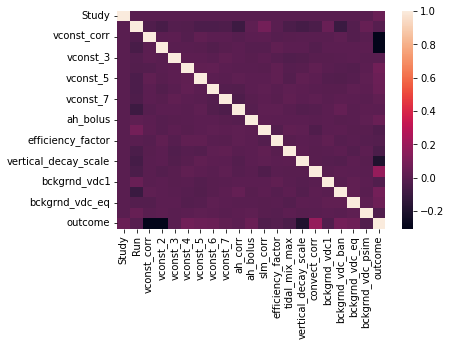

In [37]:
import matplotlib.pyplot as mp
import seaborn as sb

print(crashes_data.corr())
dataplot = sb.heatmap(crashes_data.corr())
mp.show()

Training the Decision tree model using traning set

In [12]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)


DecisionTreeClassifier()

Testing our model by making predictions on testing set and analysing the result using accuracy criteria

In [13]:
predictions = model_dt.predict(x_test)
accuracy_dt = (accuracy_score(y_test,predictions))
print(f"Decision tree accuracy: {round(accuracy_dt * 100)}%") 

Decision tree accuracy: 82%


Defining a get mean absolute error function to find the best value of number of nodes.

In [14]:
def get_mae(max_leaf_nodes , train_X , val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes , random_state=0)
    model.fit(train_X,train_y)
    preds_value = model.predict(val_X)
    mae = mean_absolute_error(val_y,preds_value)
    return (mae)

In [15]:
candidate_nodes = [8,10,5,9,15] #random values of nodes to check from
scores = {leaf_size : get_mae(leaf_size,x_train , x_test, y_train, y_test) for leaf_size in candidate_nodes}
best_tree_size = min(scores,key=scores.get)
print(best_tree_size)

best_model = DecisionTreeClassifier(max_leaf_nodes = best_tree_size)
best_model.fit(x,y) # since we know the best size , we can work upon the whole dataset
val_preds = best_model.predict(x_test )
print(mean_absolute_error(y_test,val_preds)) #minimum absolute error
best_dt_accuracy = accuracy_score(y_test,val_preds)
print(best_dt_accuracy)

5
0.05555555555555555
0.9444444444444444


Gradual increase of 10 percent in accuracy after getting the ideal value of number of leaf nodes

Confusion Matrix

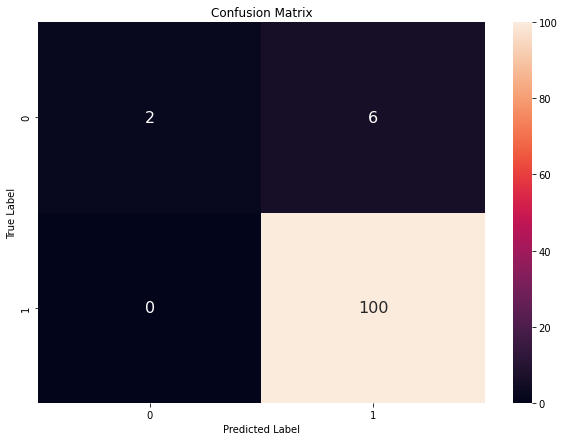

In [16]:
def plot_confusion_matrix(y_test, predictions):  
    conf_mat = pd.DataFrame(confusion_matrix(y_test, predictions))  
    fig = plt.figure(figsize=(10, 7))  
    sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt="g")  
    plt.title("Confusion Matrix")  
    plt.xlabel("Predicted Label")  
    plt.ylabel("True Label")  
    plt.show()  
   
plot_confusion_matrix(y_test, val_preds) 

Print the precision, recall and f1-scores 

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.13      0.25      0.17         8
           1       0.94      0.87      0.90       100

    accuracy                           0.82       108
   macro avg       0.53      0.56      0.54       108
weighted avg       0.88      0.82      0.85       108



Pipelining XGboost classifier

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import xgboost as xgb
num_trees = 30
pipe_lr = make_pipeline(
                        StandardScaler(),
                        PCA(n_components=2),
                        xgb.XGBClassifier(
    random_state=1,
    n_estimators=num_trees))
pipe_lr.fit(x_train, y_train)
y_pred = pipe_lr.predict(x_test)

print('Test Accuracy: %.3f' % pipe_lr.score(x_test, y_test))

Test Accuracy: 0.907


Using  cross val score to analyze accuracy over 10 different splits

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X=x_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)


CV accuracy scores: [0.86363636 0.90909091 0.90697674 0.90697674 0.90697674 0.88372093
 0.90697674 0.90697674 0.8372093  0.88372093]


Using SVM

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error

pipe_lr_1 = make_pipeline(SimpleImputer(strategy='constant'),
                          StandardScaler(),
                          PCA(n_components=2),
                          SVC(
    kernel='rbf'))
pipe_lr_1.fit(x_train, y_train)
y_pred = pipe_lr_1.predict(x_test)

print('Test Accuracy: %.3f' % pipe_lr_1.score(x_test, y_test))
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

Test Accuracy: 0.926
MAE: 0.07407407407407407


Implementing GRID search to utilize best values of parameters and hence improve accuracy

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),
                         SimpleImputer(strategy='constant'),
                         SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
              'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)
gs = gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


0.9466701902748413
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [22]:
#test accuracy
clf = gs.best_estimator_
clf.fit(x_train, y_train)
svm_acc =  clf.score(x_test, y_test)
print('Test accuracy: %.3f' % clf.score(x_test, y_test))

Test accuracy: 0.963


Using Adaboost classifier

In [23]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 30

model_ada = AdaBoostClassifier(n_estimators=num_trees )
model_ada.fit(x_train,y_train)
ada_accuracy = model_ada.score(x_test,y_test)
print(ada_accuracy)


0.9722222222222222


Using KNN classifier

findiing k value

In [24]:
import math
math.sqrt(len(y_test))

10.392304845413264

Hyperparameter tuning of k value in knn classifier

In [25]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
'''
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p = [1,2]

hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p =p)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters,cv=10)

best_model = clf.fit(x_train,y_train)


print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
'''



"\nleaf_size = list(range(1,50))\nn_neighbors = list(range(1,30))\np = [1,2]\n\nhyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p =p)\n\nknn_2 = KNeighborsClassifier()\n\nclf = GridSearchCV(knn_2, hyperparameters,cv=10)\n\nbest_model = clf.fit(x_train,y_train)\n\n\nprint('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])\nprint('Best p:', best_model.best_estimator_.get_params()['p'])\nprint('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])\n"

In [26]:
#without tuning
classifier = KNeighborsClassifier(n_neighbors=9,p=2,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.9259259259259259


Using Bagging to demonstrate results of different base models

In [27]:
from sklearn.ensemble import BaggingClassifier

For KNN as base classifier

In [28]:
bagging_knn = BaggingClassifier(estimator=KNeighborsClassifier(), max_samples=0.5, max_features=0.5,bootstrap=False, bootstrap_features=False)

bagging_knn.fit(x_train,y_train)
bg_preds = bagging_knn.predict(x_test)
bg_knn_score = bagging_knn.score(x_test,y_test)
bagging_knn.score(x_test,y_test)

0.9259259259259259

Comparing Accuracies

In [29]:
d = {'Model': [ 'Adaboost', 'Decision tree', 'Bagging_KNeighbors',' Tuned_SVM'],
     'accuracy' : [ada_accuracy, best_dt_accuracy, bg_knn_score,svm_acc]}

result_df = pd.DataFrame(data = d)
result_df

,Model,accuracy
0,Adaboost,0.972222
1,Decision tree,0.944444
2,Bagging_KNeighbors,0.925926
3,Tuned_SVM,0.962963


<AxesSubplot:title={'center':'Cloud Simulation Crash Prediction'}, xlabel='Model'>

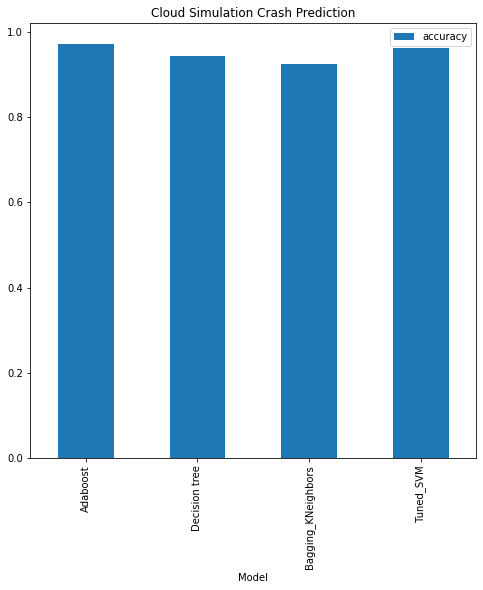

In [30]:
result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), title='Cloud Simulation Crash Prediction', 
               sort_columns=True)

Majority Voting Ensemble learning 

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('KNN', KNeighborsClassifier()))
estimator.append(('DTC', DecisionTreeClassifier()))
# HARD voting
vot_hard = VotingClassifier(estimators=estimator, voting='hard')
vot_hard.fit(x_train, y_train)
y_pred  = vot_hard.predict(x_test)
hard_vote_acc = accuracy_score(y_test, y_pred)

print("Hard Voting Score % d" % hard_vote_acc)
print(f"Hard voting  accuracy: {round(hard_vote_acc * 100)}%")

# SOFT voting 
vot_soft = VotingClassifier(estimators=estimator,voting='soft')
vot_soft.fit(x_train,y_train)
y_pred = vot_soft.predict(x_test) 
soft_vote_acc = accuracy_score(y_test, y_pred)

print("Soft Voting Score % d" % soft_vote_acc)
print(f"Soft voting  accuracy: {round(soft_vote_acc * 100)}%")

Hard Voting Score  0
Hard voting  accuracy: 94%
Soft Voting Score  0
Soft voting  accuracy: 94%


5-cross validation of 3 classifiers

In [32]:
from sklearn import model_selection
clf1 = LogisticRegression(random_state=1,max_iter = 500)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = KNeighborsClassifier()
print('5-cross validation :\n')
labels = ['LogisticRegression', 'DecisionTreeClassifier', 'KNN']
for clf ,label in zip([clf1,clf2,clf3], labels):
    scores = model_selection.cross_val_score(clf,x_train,y_train,
                                             cv=5,
                                             scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

5-cross validation :

Accuracy: 0.93 (+/- 0.01) [LogisticRegression]
Accuracy: 0.89 (+/- 0.03) [DecisionTreeClassifier]
Accuracy: 0.91 (+/- 0.01) [KNN]


Ensemble Voting Classifier

In [33]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, x_train, y_train, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.93 (+/- 0.01) [Logistic Regression]
Accuracy: 0.89 (+/- 0.03) [Random Forest]
Accuracy: 0.91 (+/- 0.01) [Naive Bayes]
Accuracy: 0.93 (+/- 0.01) [Ensemble]


We can see ensemble model provides better result than any model individually

C parameter of Logistic Regression tuning through grid search

In [34]:
from sklearn.model_selection import GridSearchCV
eclf = EnsembleVoteClassifier(clfs=[clf1,clf2,clf3], voting='soft')
params = {'logisticregression__C' : [1.0 , 100.0]
           }
grid = GridSearchCV(estimator=eclf , param_grid=params,cv=5)
grid.fit(x_train,y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')
for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

0.931 +/- 0.01 {'logisticregression__C': 1.0}
0.935 +/- 0.01 {'logisticregression__C': 100.0}


Creating the web application of the model

In [1]:
import pickle

In [ ]:
with open('model.ipynb', 'wb') as file:
pickle.dump(model_dt, file)